# STA 141B: Homework 3
Winter 2018

## Student Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name:Zihao

Last Name: Chen

Student ID: 915490404

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax


## Fruits and Veggies

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores.

The estimates are provided as a collection of MS Excel files, with one file per fruit or vegetable. The `assignment3_data.zip` file contains the fruit and vegetable files in the directories `fruit` and `vegetables`, respectively.

__Exercise 1.1.__ Use pandas to extract the "Fresh" row(s) from the <strong style="color:#B0B">fruit</strong> Excel files. Combine the data into a single data frame. Your data frame should look something like this:

type       | food       | form   | price_per_lb | yield | lb_per_cup | price_per_cup
---------- | ---------- | ------ | ------------ | ----- | ---------- | -------------
fruit      | watermelon | Fresh1 | 0.333412     | 0.52  | 0.330693   | 0.212033
fruit      | cantaloupe | Fresh1 | 0.535874     | 0.51  | 0.374786   | 0.3938
vegetables | onions     | Fresh1 | 1.03811      | 0.9   | 0.35274    | 0.406868
...        |            |        |              |       |            |


It's okay if the rows and columns of your data frame are in a different order. These modules are especially relevant:

* [`str` methods](https://docs.python.org/2/library/stdtypes.html#string-methods)
* [`os`](https://docs.python.org/2/library/os.html)
* [`os.path`](https://docs.python.org/2/library/os.path.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/): `read_excel()`, `concat()`, `.fillna()`, `.str`, plotting methods

Ask questions and search the documentation/web to find the functions you need.


In [1]:
import pandas as pd
import os


path = "./assignment3_data"
folder='fruit'


fruit=pd.DataFrame()
for files in  os.listdir(path+"/"+folder):
    a=pd.read_excel(path+"/"+folder+"/"+files,header=1).dropna()
    a=a.iloc[:,[0,1,3,4,6]]
    
    food = files [:-5]#get the fruit name. the last 5 letter is ".xlsx"
    a["type"] = folder
    a["food"] = food
    
    fruit=pd.concat([fruit,a])   

# When i check set(fruit['Form']), I found that there are two different kind of 'Fresh', 
# so i use the str.contains instead of regular expression.
fruit_fresh=fruit[fruit['Form'].str.contains('Fresh')]

#rename the columns
fruit_fresh.columns=['form','price_per_lb','yield','lb_per_cup','price_per_cup','type','food']

#reorder the columns
fruit_fresh=fruit_fresh.reindex(columns=['type','food','form','price_per_lb','yield','lb_per_cup','price_per_cup'])

fruit_fresh

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
1,fruit,apples,Fresh1,1.56752,0.9,0.242508,0.422373
1,fruit,apricots,Fresh1,3.04007,0.93,0.363763,1.1891
1,fruit,bananas,Fresh1,0.566983,0.64,0.330693,0.292965
1,fruit,blackberries,Fresh1,5.77471,0.96,0.31967,1.92292
1,fruit,blueberries,Fresh1,4.73462,0.95,0.31967,1.59318
1,fruit,cantaloupe,Fresh1,0.535874,0.51,0.374786,0.3938
1,fruit,cherries,Fresh1,3.59299,0.92,0.341717,1.33455
1,fruit,grapefruit,Fresh1,0.897802,0.49,0.462971,0.848278
1,fruit,grapes,Fresh1,2.09383,0.96,0.330693,0.721266
1,fruit,honeydew,Fresh1,0.796656,0.46,0.374786,0.649077


__Exercise 1.2.__ Reuse your code from exercise 1.1 to extract the "Fresh" row(s) from the <strong style="color:#B0B">vegetable</strong> Excel files.

Does your code produce the correct prices for tomatoes? If not, why not? Do any other files have the same problem as the tomatoes file?

You don't need to extract the prices for these problem files. However, make sure the prices are extracted for files like asparagus that don't have this problem.

In [2]:
folder='vegetables'


vegetable=pd.DataFrame()
for files in  os.listdir(path+"/"+folder):
    a=pd.read_excel(path+"/"+folder+"/"+files,header=1).dropna()
    a=a.iloc[:,[0,1,3,4,6]]
    
    food = files [:-5]#get the fruit name. the last 5 letter is ".xlsx"
    a["type"] = folder
    a["food"] = food
    
    vegetable=pd.concat([vegetable,a])   

vegetable_fresh=vegetable[vegetable['Form'].str.contains('Fresh')]

#rename the columns
vegetable_fresh.columns=['form','price_per_lb','yield','lb_per_cup','price_per_cup','type','food']

#reorder the columns
vegetable_fresh=vegetable_fresh.reindex(columns=['type','food','form','price_per_lb','yield','lb_per_cup','price_per_cup'])

vegetable_fresh

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
1,vegetables,acorn_squash,Fresh1,1.17225,0.458554,0.451948,1.15536
1,vegetables,artichoke,Fresh1,2.21305,0.375309,0.385809,2.27497
1,vegetables,asparagus,Fresh1,3.21349,0.493835,0.396832,2.58227
1,vegetables,avocados,Fresh1,2.23587,0.740753,0.31967,0.964886
1,vegetables,brussels_sprouts,Fresh1,2.76355,1.06,0.341717,0.890898
1,vegetables,butternut_squash,Fresh1,1.24474,0.714,0.451948,0.787893
1,vegetables,cabbage,Fresh green cabbage1,0.579208,0.778797,0.330693,0.245944
2,vegetables,cabbage,Fresh red cabbage1,1.05645,0.779107,0.330693,0.448412
1,vegetables,collard_greens,Fresh1,2.63084,1.16,0.286601,0.650001
1,vegetables,corn_sweet,Fresh1,2.69062,0.54,0.363763,1.8125


In [3]:
print('Does the data contains asparagus?%s'%('asparagus' in vegetable_fresh.values))

print('Does the data contains tomatoes?%s'%('tamatoes' in vegetable_fresh.values))

Does the data contains asparagus?True
Does the data contains tomatoes?False


In [4]:
#I check the tomatoes.xlsx, the format changes.
vegetable[vegetable['food']=='tomatoes']

#However, the original dataframe 'vegetable contained the data of tomatoes,but the format is changed.
#Because the homework problem said that i do not need to extract the prices for these problem files.
#I will leave them here.

,Form,Average retail price,Preparation,Size of a,Average price,type,food
2,"Grape and cherry1,2",3.28896,0.91,0.374786,1.35457,vegetables,tomatoes
3,"Roma1,3",1.24342,0.91,0.374786,0.512105,vegetables,tomatoes
4,"Beefsteak1,4",3.15921,0.91,0.374786,1.30113,vegetables,tomatoes
5,Canned5,0.924836,1,0.540133,0.499534,vegetables,tomatoes


In [5]:
#to check if there are more files have the same problems as the tomatoes file.
#I first find out which vegetables are not in the vegetable_fresh and then check whether the files of them contains a string 'Fresh'
name=[name[:-5] for name in os.listdir("./assignment3_data/vegetables")]
for i in name:
    if not (i in vegetable_fresh['food'].values):
        #open each file to check
        a=pd.read_excel("./assignment3_data/vegetables"+"/"+i+".xlsx",header=1)
        
        #check every row, does any row contain any string 'Fresh'
        for _,row in a.iterrows():
            if row.str.contains('Fresh').any():
                print(i)
                
#I double checked the list, they are all in the same format as tomatoes

broccoli
carrots
cauliflower
celery
lettuce_romaine
mushrooms
spinach
tomatoes


__Exercise 1.3.__ Remove rows without a price from the vegetable data frame and then combine the fruit and vegetable data frames. Make sure all columns of numbers are numeric (not strings).

There are two understanding of this question.

The first one is to combine the fruit_fresh and vegetable_fresh dataframe.

the second one is to combine the fruit and vegetable dataframe.

In [6]:
#i remove the na during the progress, so that i do not have any na here.
data=pd.concat([fruit_fresh,vegetable_fresh])   

print(data.isnull().any())

data[['price_per_lb','yield','lb_per_cup','price_per_cup']]=data[['price_per_lb','yield','lb_per_cup','price_per_cup']].apply(pd.to_numeric)
data.dtypes

type             False
food             False
form             False
price_per_lb     False
yield            False
lb_per_cup       False
price_per_cup    False
dtype: bool


type              object
food              object
form              object
price_per_lb     float64
yield            float64
lb_per_cup       float64
price_per_cup    float64
dtype: object

In [7]:
data.head()

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
1,fruit,apples,Fresh1,1.567515,0.90,0.242508,0.422373
1,fruit,apricots,Fresh1,3.040072,0.93,0.363763,1.189102
1,fruit,bananas,Fresh1,0.566983,0.64,0.330693,0.292965
1,fruit,blackberries,Fresh1,5.774708,0.96,0.319670,1.922919
1,fruit,blueberries,Fresh1,4.734622,0.95,0.319670,1.593177


In [8]:
datafull=pd.concat([fruit,vegetable]) 

#rename the columns
datafull.columns=['form','price_per_unit','yield','unit_per_cup','price_per_cup','type','food']

#reorder the columns
datafull=datafull.reindex(columns=['type','food','form','price_per_unit','yield','unit_per_cup','price_per_cup'])

print(datafull.isnull().any())

datafull[['price_per_unit','yield','unit_per_cup','price_per_cup']]=datafull[['price_per_unit','yield','unit_per_cup','price_per_cup']].apply(pd.to_numeric)
datafull.dtypes

type              False
food              False
form              False
price_per_unit    False
yield             False
unit_per_cup      False
price_per_cup     False
dtype: bool


type               object
food               object
form               object
price_per_unit    float64
yield             float64
unit_per_cup      float64
price_per_cup     float64
dtype: object

In [9]:
datafull.head()

,type,food,form,price_per_unit,yield,unit_per_cup,price_per_cup
1,fruit,apples,Fresh1,1.567515,0.90,0.242508,0.422373
2,fruit,apples,Applesauce2,1.077825,1.00,0.540133,0.582168
4,fruit,apples,Ready to drink3,0.727288,1.00,8.000000,0.363644
5,fruit,apples,Frozen4,0.537868,1.00,8.000000,0.268934
1,fruit,apricots,Fresh1,3.040072,0.93,0.363763,1.189102


__Exercise 1.4.__ Discuss the questions below (a paragraph each is sufficient). Use plots to support your ideas.

* What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?
* How do the price distributions compare for fruit and vegetables?
* Which foods are the best value for the price?
* What's something surprising about this data set?
* Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

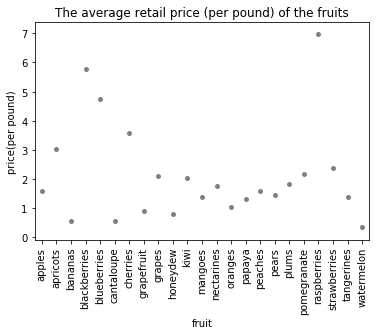

The most expensive fruit is raspberries
The least expensive fruit is watermelon


In [11]:
#What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?
price=fruit_fresh["price_per_lb"]
index=fruit_fresh["food"]
dot=sns.stripplot(x = index, y = price,color='grey')
dot.set(title = "The average retail price (per pound) of the fruits", xlabel = "fruit", ylabel = "price(per pound)")
dot.set_xticklabels(dot.get_xticklabels(),rotation = 90)
plt.show(dot)



print("The most expensive fruit is %s"% fruit_fresh["food"][fruit_fresh["price_per_lb"]==fruit_fresh["price_per_lb"].max()].iloc[0])
print("The least expensive fruit is %s"% fruit_fresh["food"][fruit_fresh["price_per_lb"]==fruit_fresh["price_per_lb"].min()].iloc[0])

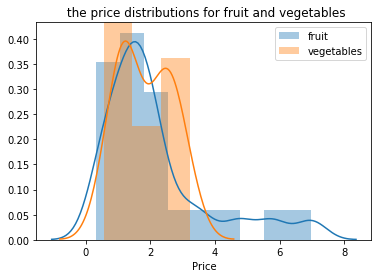

The distribution looks like similar considering we don't have much samples.


In [12]:
#How do the price distributions compare for fruit and vegetables?

plot1=sns.distplot([fruit_fresh["price_per_lb"].tolist()],label="fruit")
plot2=sns.distplot([vegetable_fresh["price_per_lb"].tolist()],label="vegetables")
plt.legend(loc=1)
plt.title(' the price distributions for fruit and vegetables')
plt.xlabel('Price')
plt.show()
print("The distribution looks like similar considering we don't have much samples.")



#some comments about the plot here
#The plot is based on categories. 
#In this question we consider they are all equivalent to each other and it is not meaningful in real life.
#If we consider other respects such as the productivity or the consumption, the distribution plots of the fruit and vegetablesc may change.

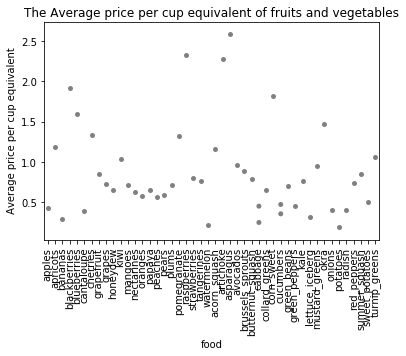

The worst value for the price is asparagus
The best value for the price is potatoes


In [13]:
#Which foods are the best value for the price?

# As my understading, the "Average price per cup equivalent" shows the answer.
# Actually, I am not sure.

price=data["price_per_cup"]
index=data["food"]

dot=sns.stripplot(x = index, y = price,color='grey')
dot.set(title = "The Average price per cup equivalent of fruits and vegetables", xlabel = "food", ylabel = " Average price per cup equivalent")
dot.set_xticklabels(dot.get_xticklabels(),rotation = 90)
plt.show(dot)



print("The worst value for the price is %s"% data["food"][data["price_per_cup"]==data["price_per_cup"].max()].iloc[0])
print("The best value for the price is %s"% data["food"][data["price_per_cup"]==data["price_per_cup"].min()].iloc[0])

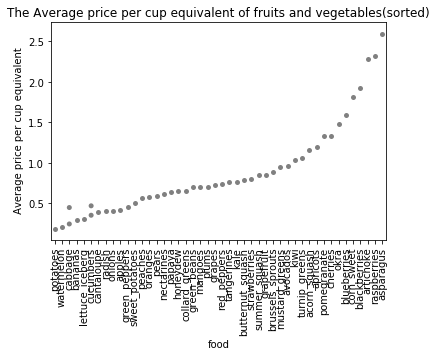

As shown in this graph, the price changes seems is linear at the begining, but not in the end


In [14]:
#What's something surprising about this data set?


#I sort the price here to find out more.

data_sort=data.sort_values(by='price_per_cup')

price=data_sort["price_per_cup"]
index=data_sort["food"]

# the plot is not monotonous because there are two kinds of cabbage and cucumbers.
#The conclusion is still hold so that i did not work more on it.
#dot=sns.stripplot(x = price, y = price , color='grey')
#this will fix the monotonous problem but the x axis is ugly.

dot=sns.stripplot(x = index, y = price , color='grey')
dot.set(title = "The Average price per cup equivalent of fruits and vegetables(sorted)", xlabel = "food", ylabel = " Average price per cup equivalent")
dot.set_xticklabels(dot.get_xticklabels(),rotation = 90)
plt.show(dot)

print('As shown in this graph, the price changes seems is linear at the begining, but not in the end')

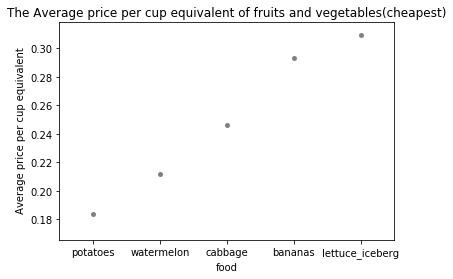

In [15]:
#Which foods do you expect to provide the best combination of price, yield, and nutrition? 
#A future assignment may combine this data set with another so you can check your hypothesis.

#I need to check the nutrition of them.
#If just guessing by intuition, considering the nurtition per price, I think the cheaper the better.

price=data_sort["price_per_cup"].head()
index=data_sort["food"].head()

# the plot is not monotonous because there are two kinds of cabbage and cucumbers.
#The conclusion is still hold so that i did not work more on it.
#dot=sns.stripplot(x = price, y = price , color='grey')
#this will fix the monotonous problem but the x axis is ugly.

dot=sns.stripplot(x = index, y = price , color='grey')
dot.set(title = "The Average price per cup equivalent of fruits and vegetables(cheapest)", xlabel = "food", ylabel = " Average price per cup equivalent")
dot.set_xticklabels(dot.get_xticklabels())
plt.show(dot)